<a href="https://colab.research.google.com/github/diegopescoalcalde/portfolio/blob/master/Custom_Dashboard_to_Monitor_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Custom Dashboard to Monitor COVID-19**
---
*by [Diego Pesco Alcalde](https://www.linkedin.com/in/diegopesco/)*

<br>


![COVID](https://static.vecteezy.com/system/resources/thumbnails/001/040/238/original/covid-19-pandemic-outbreak-illustration-with-world-map.jpg)

<br>

**More than 450000 people have already died of COVID-19 in the world until today (June 29th, 2020).** The pandemic outbreak will surely be part of History classes in the future, just as the bubonic plague and the influenza ones. What makes COVID-19 different from the other public health crisis is that it is the first worldwide pandemic to happen in the generation of high speed communication. Using the appropriate equipment, scientists were able to map different aspects of the virus structure and transmission very fast. They were able to share information from different places of the world using the internet, and work together to come up with ideas and solutions to the impacts of the disease. Not only that, governments are able to monitor in real time the numbers and make decisions based in data. I cannot think of any other pandemic crisis that generated more information than this one. For more than 6 months it is the most discussed topic in the entire world and it will still be for at least a couple more.

So after seeing many different news showing all sorts of numbers, graphs and forecasts for the disease transmission and its impacts, I decided to create a dashboard to monitor the situation in different countries and come up with my own theories and conclusions. 

My objective in this study was to **find out how well Brazil is dealing with the public health crisis when compared to other countries.**

Link to the dashboard: https://covid-dash-streamlit.herokuapp.com/

The dashboard was developed in Streamlit to allow quick variable changes, but I reproduced the code to generate the charts below.

Another important point: Since the data available here comes from different sources with different measurements (countries' governments), I restricted my analysis to a graphical visualization and did not create models or regressions of data. There are too many sources of variation that can influence the model and the predictions.

<br>



<br>



## Data Collection and Pre-processing

There are many datasets that could be used for this study. I decided to work with data from [Our World In Data](https://ourworldindata.org/), a reference when reliable data is needed about different topics of the world, and the official reference adopted by John Hopkings University for their tracking of the pandemic spread.
The dataset for the study is an official report of COVID-19 which is publicly available on Our World in Data [Github](https://github.com/owid/covid-19-data/tree/master/public/data). I ran this analysis on June 29rd, 2020, so if you reproduce the code after that your conclusions may be different from mine.

I start the study importing the libraries in Python and the dataset.


In [ ]:
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Seaborn Style Graphs
sns.set()
sns.set_style("dark")

# Import data in a dataset
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")


Then I do quick check to see if the dataset looks ok and what sort of information can be found in it.

In [ ]:
# Reproduce dataset initial and last rows
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27595,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27596,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27597,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27598,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The numbers are related per country per day, so time series of each country can be built. There is a combination of COVID-19 numbers, as well as statistics of public health and demographics.

Now let's check a summary of the dataset structure.

In [ ]:
# Show a summary of dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27600 entries, 0 to 27599
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         27536 non-null  object 
 1   continent                        27351 non-null  object 
 2   location                         27600 non-null  object 
 3   date                             27600 non-null  object 
 4   total_cases                      27376 non-null  float64
 5   new_cases                        27376 non-null  float64
 6   total_deaths                     27376 non-null  float64
 7   new_deaths                       27376 non-null  float64
 8   total_cases_per_million          27312 non-null  float64
 9   new_cases_per_million            27312 non-null  float64
 10  total_deaths_per_million         27312 non-null  float64
 11  new_deaths_per_million           27312 non-null  float64
 12  total_tests       

The total of rows will depend on the day the code is run, but today (June 29th) when I started the study, there are 26959 entries, and 34 variables.

There is a considerable quantity of null data, I will check what is the relation among the null data and the total.

In [ ]:
#Check for missing values in the dataset
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

new_tests                          0.721667
new_tests_per_thousand             0.721667
total_tests_per_thousand           0.705507
total_tests                        0.705507
new_tests_smoothed_per_thousand    0.684420
new_tests_smoothed                 0.684420
tests_units                        0.661739
handwashing_facilities             0.591304
extreme_poverty                    0.403406
male_smokers                       0.285254
female_smokers                     0.276848
stringency_index                   0.198877
hospital_beds_per_thousand         0.174384
aged_65_older                      0.109964
gdp_per_capita                     0.107428
aged_70_older                      0.101775
median_age                         0.097138
cvd_death_rate                     0.096051
diabetes_prevalence                0.066630
population_density                 0.043804
life_expectancy                    0.013949
new_deaths_per_million             0.010435
total_deaths_per_million        

It seems that the columns about number of tests are the ones with most missing data. Since this analysis will be mainly graphical, I will not replace or drop the missing values. The interpreter of the graphical libraries is able to work with them and leave blank spaces in the time series. This is not recommended if calculations or models are applied using the numbers.

## Visual Analysis

Now, there is no totally fair way of doing comparisons about the pandemic spread and its impacts. One can always argue that there are differences in specific aspects of the countries. In my opinion, the total population of a country is one of these critical aspects. Not because the more people, the more sick people there will be (there are normalized variables for that), but I believe that establishing public policies is very different in small and big countries. So I will do my analysis considering only countries with population of more than 200 million people, and will include Brazil in it. I will choose Brazil, China, United States, Nigeria, Pakistan, Indonesia and India.


I created in my dashboard a section with information of Population, Population Density, Life Expectancy and Stringency Index of countries, so I made this information available in the table below. Stringency Index is a measurement of how "severe" were lockdown actions in the country, being a high index related to severe lockdowns.

In [ ]:

place = "Brazil", "China", "United States", "Nigeria", "Pakistan", "Indonesia", "India"

demographics = df.loc[df.location.isin(place)]
demographics = demographics.groupby(['location']).mean()
demographics.loc[:,['population', 'population_density', 'life_expectancy', 'stringency_index', 'aged_70_older', 'extreme_poverty']]


,population,population_density,life_expectancy,stringency_index,aged_70_older,extreme_poverty
location,,,,,,
Brazil,2.125594e+08,25.040,75.88,45.734971,5.060,3.4
China,1.439324e+09,147.674,76.91,65.196278,5.929,0.7
India,1.380004e+09,450.419,69.66,54.025363,3.414,21.2
Indonesia,2.735236e+08,145.725,71.72,47.253533,3.053,5.7
Nigeria,2.061396e+08,209.588,54.69,47.345128,1.447,NaN
Pakistan,2.208923e+08,255.573,67.27,52.699157,2.780,4.0
United States,3.310026e+08,35.608,78.86,43.842273,9.732,1.2


Being 100 the maximum value for the stringency index and considering the news information, I was expecting bigger differences in the values for the countries of the list. But as reported, Brazil and United States took less actions than most countries to hold the spread so their index is indeed smaller. As we can see, even though countries have similar population there are many differences in their demographics.

How these variables relate to what happened in the last months? First I will check the number of cases per million habitants.

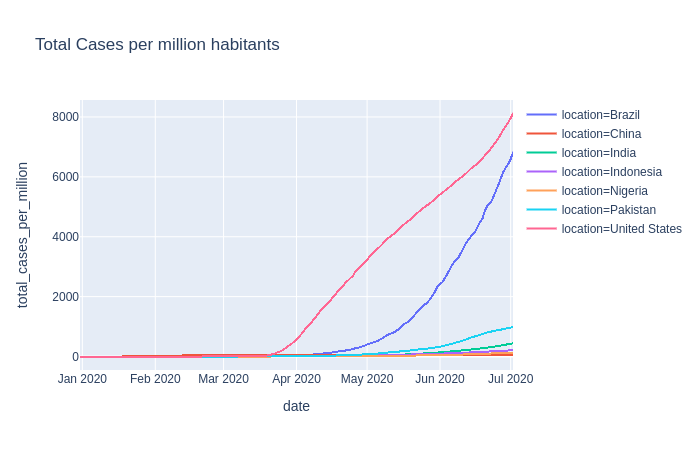

In [ ]:
place = "Brazil", "China", "United States", "Nigeria", "Pakistan", "Indonesia", "India"

country = df.loc[df.location.isin(place)]
fig = px.line(country, x="date", y="total_cases_per_million", title='Total Cases per million habitants', color='location')
fig.show("png")

The total reported cases of United States and Brazil per million habitants is much larger than for the other countries. Are these countries struggling more on the battle against COVID-19 or they are just reporting more than the others? Let's see the total number of tests done per thousand habitants.

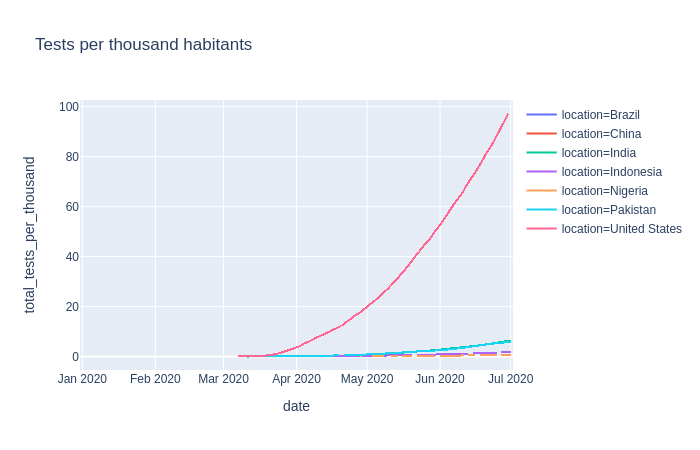

In [ ]:


fig = px.line(country, x="date", y="total_tests_per_thousand", title='Tests per thousand habitants', color='location')
fig.show("png")

The United States is definetely testing much more people, so it could be related to the number of cases there. The number of tests done in Brazil was not reported in the dataset, but there are many sources such as [this one](https://www.washingtonpost.com/world/the_americas/coronavirus-brazil-testing-bolsonaro-cemetery-gravedigger/2020/04/22/fe757ee4-83cc-11ea-878a-86477a724bdb_story.html) reporting that Brazil is testing much less than most other countries. So it is fair to say that the number of reported cases in Brazil is not because it is testing more than the other countries. 

So the question that comes into my mind is how did Brazil reach such a high number of cases testing the same quantity or less people than the other countries? Of all the countries selected for the analysis, Brazil has:
* The second smaller population (only bigger than Nigeria's)
* The smaller population density
* The third highest life expectancy
* The second lowest stringency index (but not so different from Nigeria's and Indonesia's)
* The third higher number of people above 70 years old

Is that difference in the stringency index enough to explain the situation? Or could it be the number of older people?

Now I will plot the number of deaths per million habitants to see what we can learn from it.

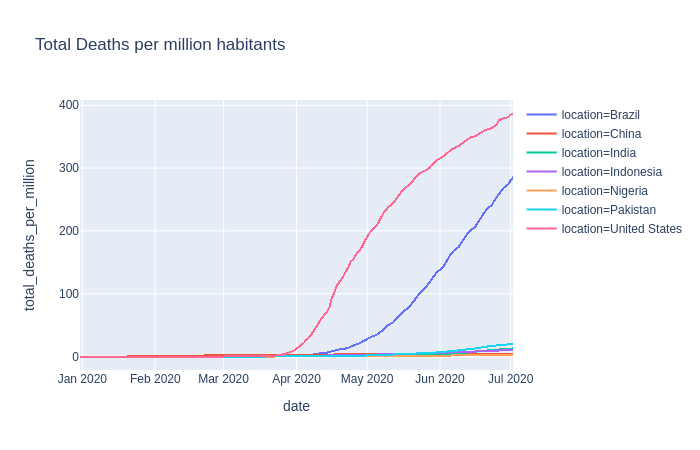

In [ ]:

fig = px.line(country, x="date", y="total_deaths_per_million", title='Total Deaths per million habitants', color='location')
fig.show("png")

By seeing the slope of the curves here, it is possible to see how sudden was the pandemic impact in the US. In one month the total reported deaths per million changed from 12 to 190. In Brazil the slope was smaller, but it is still in an increasing trend. The trend is different from other countries where the outbreak was more severe, and could be caused by an earlier lockdown or subnotification in the first weeks. If slopes do not change in less than one month Brazil will be the country with the highest number of deaths per million people among the ones that we are looking at.

## Conclusions

In order to get some insights and verify theories about COVID-19 crisis I created a dashboard where we can monitor the status of cases, deaths and tests using the data from Our World in Data. To give an example of the sort of analysis that can be done with the material I compared the situation of countries with more than 200 million habitants. The disparity of the numbers is evident and shows how many questions and theories can come from a quick data visualization exercise. Some of the important conclusions are:

* United States and Brazil are in a whole different level of cases and deaths than the other countries, what makes me think think of two questions. The first, is this the real situation of the other countries or a strong subnotification issue? And the second, if the data is right, what did United States and Brazil did so differently from these countries to face the issue in a different scale?
* The number of cases in the United States can be explained by the much bigger scale in which tests are being done there when compared to any other country of our list. United States started increasing the number of tests per thousand habitants in April, when the number of deaths started rising, but it was too late to avoid the more of 100,000 deaths reported so far. There was a clear change of mindset in government that is helping to avoid a far worse situation there.
* According to data of public health ministry, Brazil has distributed around 10 million tests, what puts it close to the numbers of India and Pakistan in tests per thousand habitants, so Brazil has not tested more than these other countries (more data available in Portuguese [here](https://www.saude.gov.br/noticias/agencia-saude/47113-saude-passa-a-testar-100-dos-casos-leves-de-covid-19) and [here](https://covid.saude.gov.br/)). So the number of cases and deaths in Brazil is extremely concerning and the causes must be investigated. 
* Another point widely discussed is if the virus transmission is higher in poor places. Using the extreme poverty as an indicator of countries that have more or less poor population, that theory does not seem so easy to validate, and India is the main example of that. I will not be naive and pretend that subnotification is not huge in poor places, however the numbers of deaths (which are more easily reported) seem to be much bigger in places where the population is older or where governments openly started taking measures late. [This material](https://edition.cnn.com/2020/04/28/india/india-coronavirus-outbreak-explained-intl-hnk/index.html) discuss some theories of why the numbers in India are small, which can be very helpful in this comparison.



It is important to state that this dataset is not a source of truth. It relies on data governments share with the global organizations, so before any of the conclusions written above can be considered valid, a fact-check process needs to be done to understand if governments are collecting and reporting this data in a similar manner. That does not mean that nothing can be done with the material. Data is the most powerful way to tackle a problem, and helps us to understand where to look at. Studies have to be done in iterative way, in which every dataset helps to narrow down the problem a little bit more, until final answers are found. I hope this material can help as a first step for other studies about this topic, and that we can really consolidate all the available information to avoid a similar crisis in the future.

